In [4]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import keras
import glob

In [6]:
train_files = glob.glob("E:/Task-3 SnT/chest_xray/train/*/**")

In [7]:
len(train_files)

5216

In [43]:
dict={0 :'normal',1: 'viral pneumonia',2: 'bacterial pneumonia'}

In [8]:
train_files[5200
           ]

'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person993_virus_1671.jpeg'

In [9]:
from random import shuffle
shuffle(train_files)
train_files

['E:/Task-3 SnT/chest_xray/train\\NORMAL\\IM-0493-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person666_bacteria_2558.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\NORMAL\\NORMAL2-IM-0962-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person1571_virus_2728.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person296_bacteria_1392.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person629_bacteria_2508.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person398_bacteria_1799.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person460_bacteria_1958.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\NORMAL\\IM-0629-0001-0002.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\NORMAL\\NORMAL2-IM-0512-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person684_bacteria_2580.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\NORMAL\\NORMAL2-IM-1158-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person1320_bacteria_3351.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\NORMAL\\IM-0562-0001

In [10]:
from PIL import Image

In [11]:
pic = Image.open(train_files[5200])

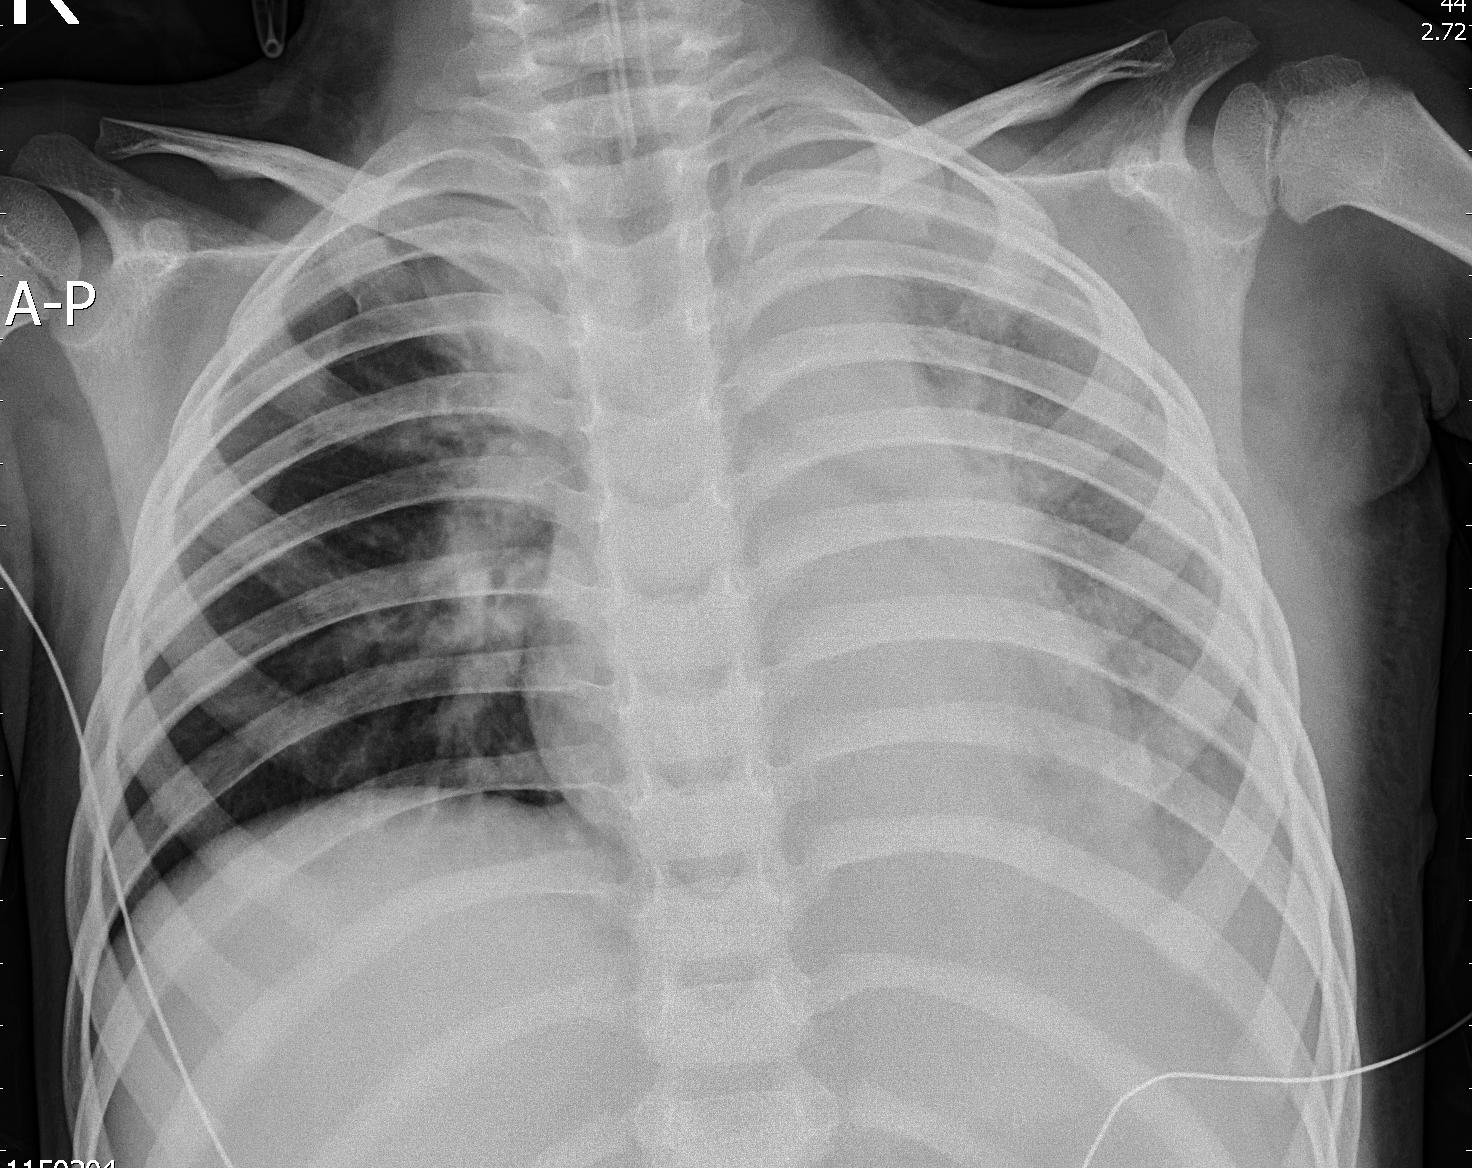

In [12]:
plt.show(pic)
pic

In [13]:
import cv2

In [14]:
pic = cv2.imread(train_files[5200],cv2.IMREAD_GRAYSCALE)

In [15]:
pic.shape

(1168, 1472)

In [16]:
shape=(128,128)

In [17]:
pic1=cv2.resize(pic , shape, interpolation = cv2.INTER_AREA)

In [18]:
pic1.shape

(128, 128)

In [19]:
X_train = np.zeros((len(train_files),128,128))

In [20]:
for i,fi in enumerate(train_files):
    pic = cv2.imread(fi,cv2.IMREAD_GRAYSCALE)
    pic1=cv2.resize(pic , shape, interpolation = cv2.INTER_AREA)
    X_train[i,:,:]=pic1

In [21]:
key1 = '\\'
key2 = '\\'
Y_train = np.zeros((len(train_files),1))

In [100]:
for i,fi in enumerate(train_files):
     label=fi.partition(key1)[2].partition(key2)[0]
     if (label=='NORMAL'):
         val=0
     else:
        if fi.partition('_')[2].partition('_')[2].partition('_')[0]=='virus' :
             val=1
        elif fi.partition('_')[2].partition('_')[2].partition('_')[0]=='bacteria' :
             val=2
     Y_train[i,:]=val

In [23]:
Y_train[226]

array([1.])

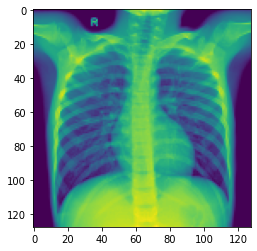

In [24]:
plt.imshow(X_train[0])

In [25]:
X_train[0]

array([[ 2.,  2.,  2., ..., 34., 34., 34.],
       [28., 28., 28., ..., 51., 51., 50.],
       [50., 51., 51., ..., 63., 63., 62.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [26]:
X_train/255.0

array([[[0.00784314, 0.00784314, 0.00784314, ..., 0.13333333,
         0.13333333, 0.13333333],
        [0.10980392, 0.10980392, 0.10980392, ..., 0.2       ,
         0.2       , 0.19607843],
        [0.19607843, 0.2       , 0.2       , ..., 0.24705882,
         0.24705882, 0.24313725],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.17254902, 0.17647059, 0.17254902, ..., 0.34117647,
         0.37647059, 0.37254902],
        [0.18039216, 0.18431373, 0.18823529, ..., 0.32156863,
         0.32156863, 0.37254902],
        [0.18039216, 0.17254902, 0.17647059, ..., 0.30588235,
         0.31372549, 0.34117647],
        ...,
        [0.07058824, 0.10980392, 0.22745098, ..., 0.08235294,
         0.09411765, 0.16470588],
        [0.0

In [27]:
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [28]:
     model= keras.Sequential()
     model.add(Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape=(128, 128, 1)))
     model.add(MaxPooling2D(2,2))
     model.add(tf.keras.layers.BatchNormalization())
     model.add(tf.keras.layers.Dropout(0.3)) #here added dropout
     model.add(Conv2D(64,(3,3), strides=1,padding= 'Same', activation='relu'))
     model.add(MaxPooling2D(2,2))
     model.add(tf.keras.layers.BatchNormalization())
     model.add(Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
     model.add(tf.keras.layers.BatchNormalization())
     model.add(Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
     model.add(MaxPooling2D(2,2))
     model.add(tf.keras.layers.BatchNormalization())
     model.add(Flatten())
     model.add(tf.keras.layers.Dropout(0.5))
     model.add(Dense(512, activation = "relu"))
     model.add(tf.keras.layers.Dropout(0.5))
     model.add(Dense(3, activation = "softmax"))
   

In [29]:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-3),
     loss='sparse_categorical_crossentropy',
     metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0

In [31]:
X_train=X_train.reshape(len(X_train),128,128,1)

In [32]:
X_train.shape

(5216, 128, 128, 1)

In [33]:
model.fit(X_train, Y_train,epochs=2,validation_split=0.1)

Epoch 1/2
147/147 [==============================] - 68s 450ms/step - loss: 0.6822 - accuracy: 0.9101 - val_loss: 0.3117 - val_accuracy: 0.9004
Epoch 2/2
147/147 [==============================] - 68s 462ms/step - loss: 0.1533 - accuracy: 0.9610 - val_loss: 0.2638 - val_accuracy: 0.9272


In [34]:
test_data = glob.glob("E:/Task-3 SnT/chest_xray/test/*/**")

In [35]:
from random import shuffle
shuffle(test_data)
test_data

['E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person1625_virus_2817.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person130_bacteria_623.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\NORMAL\\IM-0097-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person1631_virus_2826.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person158_bacteria_743.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\NORMAL\\IM-0101-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person94_bacteria_458.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person147_bacteria_705.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person54_virus_109.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person171_bacteria_826.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person39_virus_85.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\NORMAL\\NORMAL2-IM-0130-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person143_bacteria_687.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person45_virus_95.jpeg',
 'E:/Task-3 

In [142]:
p=cv2.imread(test_data[124],cv2.IMREAD_GRAYSCALE)
p

array([[136, 130, 121, ..., 162, 184, 201],
       [137, 131, 123, ..., 193, 188, 185],
       [136, 131, 123, ..., 187, 196, 203],
       ...,
       [ 12,  11,  12, ...,  23,  21,  24],
       [ 11,  11,  12, ...,  23,  21,  24],
       [ 11,  11,  12, ...,  23,  21,  24]], dtype=uint8)

In [143]:
test_data[124]

'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person1_virus_11.jpeg'

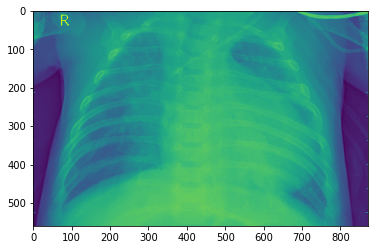

In [144]:
plt.imshow(p)
x_test=cv2.resize(p , shape, interpolation = cv2.INTER_AREA)


In [145]:
x_test/255.0

array([[0.45882353, 0.39607843, 0.39607843, ..., 0.43137255, 0.59607843,
        0.72156863],
       [0.43137255, 0.38431373, 0.38823529, ..., 0.73333333, 0.74901961,
        0.74509804],
       [0.40784314, 0.40392157, 0.38823529, ..., 0.73333333, 0.67843137,
        0.58823529],
       ...,
       [0.04705882, 0.12156863, 0.18823529, ..., 0.10196078, 0.11372549,
        0.09803922],
       [0.04313725, 0.13333333, 0.18823529, ..., 0.10196078, 0.10588235,
        0.09803922],
       [0.03921569, 0.14509804, 0.18823529, ..., 0.10196078, 0.10588235,
        0.09803922]])

In [146]:
X_test=x_test.reshape(1,128,128,1)

In [147]:
y_test = model.predict(X_test)

In [148]:
for i in y_test:
    y_test = np.argmax(i)
print('Label : ',dict[y_test])

Label :  viral pneumonia


In [149]:
y_test

1